In [1]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

from matplotlib import pyplot as plt
import pandas as pd

cpu


In [2]:
# загружаем данные из сети:
data = pd.read_csv("https://skillsmart.ru/data/apples_pears.csv")
data.head() # проверяем, правильно ли загрузилось

,yellowness,symmetry,target
0,0.779427,0.257305,1.0
1,0.777005,0.015915,1.0
2,0.977092,0.304210,1.0
3,0.043032,0.140899,0.0
4,0.760433,0.193123,1.0


In [3]:
import torch
import numpy as np # всегда пригодится :)
from torch.nn import Linear, Sigmoid, Tanh

# инициализируем девайс
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# добавляем типовую функцию "шаг обучения"
def make_train_step(model, loss_fn, optimizer):
    def train_step(x, y):
        model.train()
        yhat = model(x)
        loss = loss_fn(yhat, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        return loss.item()
    return train_step

In [17]:
X = torch.FloatTensor(data.iloc[:,:2].values)  # матрица (два признака)

# класс/тип объектов (столбец из нулей и единиц)
y = torch.FloatTensor(data['target'].values.reshape((-1, 1))) # сжимаем до одного измерения

# в датасете тысяча точек
print(X.data.shape, y.data.shape)

torch.Size([1000, 2]) torch.Size([1000, 1])


In [36]:
from torch import optim, nn

neuron = torch.nn.Sequential(
    Linear(2, out_features=1),
    nn.Hardsigmoid()
)
print(neuron.state_dict())

lr = 10
n_epochs = 1000
loss_fn = nn.MSELoss(reduction="mean")
optimizer = optim.Adam(neuron.parameters(), lr=lr)
train_step = make_train_step(neuron, loss_fn, optimizer)

a = []
b = []
for epoch in range(n_epochs):
    loss = train_step(X, y)
    a.append(epoch)
    b.append(loss)

print(neuron.state_dict())
print(loss)

OrderedDict([('0.weight', tensor([[-0.5754, -0.3664]])), ('0.bias', tensor([0.1145]))])
OrderedDict([('0.weight', tensor([[ 121.2139, -200.2701]])), ('0.bias', tensor([-39.0085]))])
0.0013035942101851106


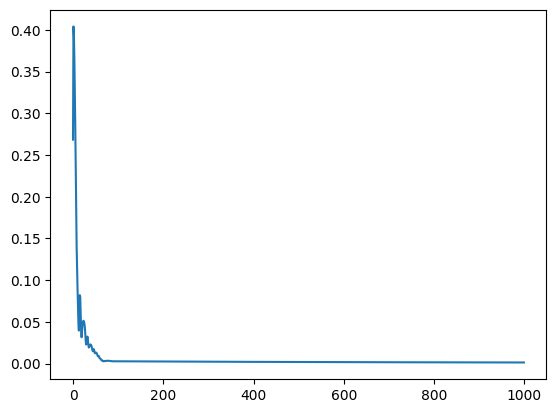

In [37]:

# plot
fig, ax = plt.subplots()

ax.plot(a, b)



plt.show()

In [12]:
print(my_plot[0])

(0, 0.25710755586624146)
